### **CS6700** : Reinforcement Learning

Assignment problem 01

*   **Environment** : [Cartpole](https://www.gymlibrary.dev/environments/classic_control/cart_pole/)
*   **Algorithm** : Actor-Critic

In [ ]:
'''
Installing packages for rendering the game on Colab
'''

!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1
!pip install git+https://github.com/tensorflow/docs > /dev/null 2>&1

In [ ]:
!pip install tensorflow-gpu

In [ ]:
'''
Import required libraries
'''

import numpy as np
import random
import torch
import torch.nn as nn  
import torch.nn.functional as F
from collections import namedtuple, deque
import torch.optim as optim
import datetime
import gym
from gym.wrappers import Monitor
import glob
import io
import base64
import matplotlib.pyplot as plt
from IPython.display import HTML
from pyvirtualdisplay import Display
import tensorflow as tf
from IPython import display as ipythondisplay
from PIL import Image
import tensorflow_probability as tfp

In [ ]:
env = gym.make('CartPole-v1')
env.seed(0)

state_shape = env.observation_space.shape[0]
no_of_actions = env.action_space.n

print(state_shape)
print(no_of_actions)
print(env.action_space.sample())

''' Get initial state of the environment'''
state = env.reset()   

print(state)

action = env.action_space.sample()  

print(action)
''' Calculate the new state with rewards based on previous state-action ''''
next_state, reward, done, info = env.step(action) 

print(next_state)
print(reward)
print(done)
print(info)


4
2
0
----
[-0.04456399  0.04653909  0.01326909 -0.02099827]
----
1
----
[-0.04363321  0.24146826  0.01284913 -0.30946528]
1.0
False
{}
----


### **Part 1: One-Step Actor-Critic Algorithm**

Initializing Actor-Critic Network

In [ ]:
class ActorCriticModel(tf.keras.Model):
    """
    Defining policy and value networkss
    """
    def __init__(self, action_size, n_hidden1=512, n_hidden2=256):
        super(ActorCriticModel, self).__init__()

        #Hidden Layer 1
        self.fc1 = tf.keras.layers.Dense(n_hidden1, activation='relu')
        #Hidden Layer 2
        self.fc2 = tf.keras.layers.Dense(n_hidden2, activation='relu')
        
        #Output Layer for policy
        self.pi_out = tf.keras.layers.Dense(action_size, activation='softmax')
        #Output Layer for state-value
        self.v_out = tf.keras.layers.Dense(1)

    def call(self, state):
        """
        Computes policy distribution and state-value for a given state
        """
        layer1 = self.fc1(state)
        layer2 = self.fc2(layer1)

        pi = self.pi_out(layer2)
        v = self.v_out(layer2)

        return pi, v

### Agent Class

Code to compute $\delta_t$ inside the Agent.learn() function



In [ ]:
from re import S
class Agent:
    """
    Agent class
    """
    def __init__(self, action_size, lr=0.001, gamma=0.99, seed = 85):
        self.gamma = gamma
        self.ac_model = ActorCriticModel(action_size=action_size)
        self.ac_model.compile(tf.keras.optimizers.Adam(learning_rate=lr))
        np.random.seed(seed)
    
    def sample_action(self, state):
        """
        Given a state, compute the policy distribution over all actions and sample one action
        """
        pi,_ = self.ac_model(state)

        action_probabilities = tfp.distributions.Categorical(probs=pi)
        sample = action_probabilities.sample()

        return int(sample.numpy()[0])

    def actor_loss(self, action, pi, delta):
        """
        Compute Actor Loss
        """
        return -tf.math.log(pi[0,action]) * delta

    def critic_loss(self,delta):
        """
        Critic loss aims to minimize TD error
        """
        return delta**2

    @tf.function
    def learn(self, state, action, reward, next_state, done):
        """
        For a given transition (s,a,s',r) update the paramters by computing the
        gradient of the total loss
        """
        with tf.GradientTape(persistent=True) as tape:
            pi, V_s = self.ac_model(state)
            _, V_s_next = self.ac_model(next_state)

            ##Add this line
            #V_s_next = tf.stop_gradient(V_s_next)

            V_s = tf.squeeze(V_s)
            V_s_next = tf.squeeze(V_s_next)
            

            #### TO DO: Write the equation for delta (TD error)
            ## Write code below
            delta = reward + 0.99 * V_s_next - V_s

            loss_a = self.actor_loss(action, pi, delta)
            loss_c =self.critic_loss(delta)
            loss_total = loss_a + loss_c

        gradient = tape.gradient(loss_total, self.ac_model.trainable_variables)
        self.ac_model.optimizer.apply_gradients(zip(gradient, self.ac_model.trainable_variables))

### Train the Network

#######################################
############# Starting Experiment  0 #############
#######################################
Episode  10 Reward 22.000000 Average Reward 23.300000
Episode  20 Reward 14.000000 Average Reward 32.300000
Episode  30 Reward 15.000000 Average Reward 36.900000
Episode  40 Reward 71.000000 Average Reward 37.600000
Episode  50 Reward 229.000000 Average Reward 79.600000
Episode  60 Reward 82.000000 Average Reward 72.400000
Episode  70 Reward 103.000000 Average Reward 91.500000
Episode  80 Reward 117.000000 Average Reward 116.800000
Episode  90 Reward 68.000000 Average Reward 108.100000
Episode  100 Reward 105.000000 Average Reward 120.300000
Episode  110 Reward 113.000000 Average Reward 134.400000
Episode  120 Reward 129.000000 Average Reward 154.700000
Episode  130 Reward 124.000000 Average Reward 127.700000
Episode  140 Reward 184.000000 Average Reward 133.000000
Episode  150 Reward 108.000000 Average Reward 130.200000
Episode  160 Reward 56.000000 Averag

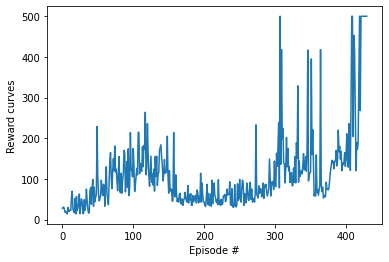

#######################################
############# Starting Experiment  1 #############
#######################################
Stopped at Episode  -99

 Variance of the 1th run is8841.217837329727

Solved at episode 1: average reward: 111.63!


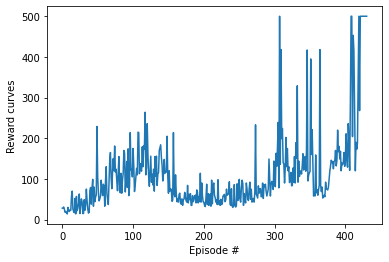

#######################################
############# Starting Experiment  2 #############
#######################################
Stopped at Episode  -99

 Variance of the 2th run is8841.217837329727

Solved at episode 1: average reward: 112.00!


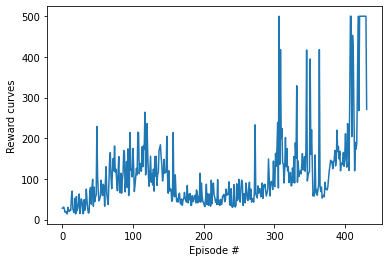

#######################################
############# Starting Experiment  3 #############
#######################################
Stopped at Episode  -99

 Variance of the 3th run is8841.217837329727

Solved at episode 1: average reward: 112.34!


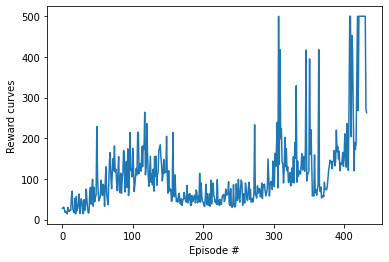

#######################################
############# Starting Experiment  4 #############
#######################################
Stopped at Episode  -99

 Variance of the 4th run is8841.217837329727

Solved at episode 1: average reward: 112.77!


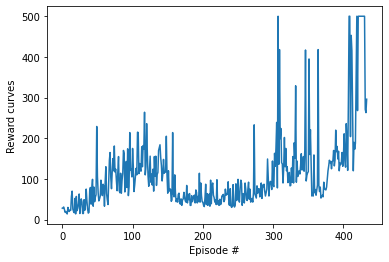

#######################################
############# Starting Experiment  5 #############
#######################################
Stopped at Episode  -99

 Variance of the 5th run is8841.217837329727

Solved at episode 1: average reward: 113.05!


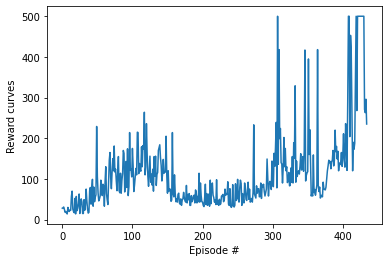

#######################################
############# Starting Experiment  6 #############
#######################################
Stopped at Episode  -99

 Variance of the 6th run is8841.217837329727

Solved at episode 1: average reward: 113.33!


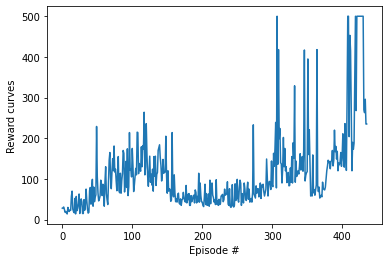

#######################################
############# Starting Experiment  7 #############
#######################################
Stopped at Episode  -99

 Variance of the 7th run is8841.217837329727

Solved at episode 1: average reward: 113.90!


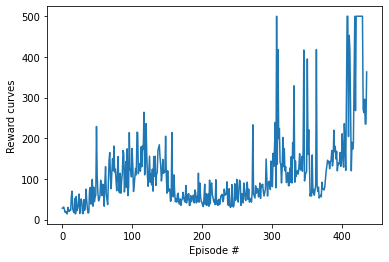

#######################################
############# Starting Experiment  8 #############
#######################################
Stopped at Episode  -99

 Variance of the 8th run is8841.217837329727

Solved at episode 1: average reward: 114.20!


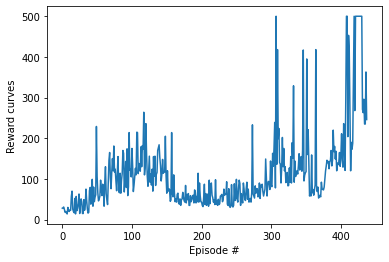

#######################################
############# Starting Experiment  9 #############
#######################################
Stopped at Episode  -99

 Variance of the 9th run is8841.217837329727

Solved at episode 1: average reward: 114.68!


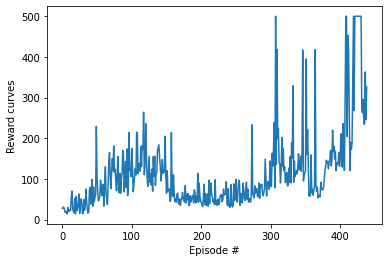

Variance of Episodic Reward [8841.217837329727, 8841.217837329727, 8841.217837329727, 8841.217837329727, 8841.217837329727, 8841.217837329727, 8841.217837329727, 8841.217837329727, 8841.217837329727, 8841.217837329727]
0:06:17.737186


In [ ]:
env = gym.make('CartPole-v1')

import statistics

#Initializing Agent
agent = Agent(lr=1e-4, action_size=env.action_space.n)
#Number of episodes
episodes = 1000
tf.compat.v1.reset_default_graph()

reward_list = []
average_reward_list = []
begin_time = datetime.datetime.now()
experiments=10

total_episodic_reward=[]
variance_episodic_reward=[]
total_running_reward=np.zeros(episodes+1)

for i in range(experiments):
  print("#######################################")
  print("############# Starting Experiment ",i,"#############")
  print("#######################################")
  for ep in range(1, episodes + 1):
      state = env.reset().reshape(1,-1)
      done = False
      ep_rew = 0
      total_running_reward=np.zeros(episodes+1)
      while not done:
          action = agent.sample_action(state) ##Sample Action
          next_state, reward, done, info = env.step(action) ##Take action
          next_state = next_state.reshape(1,-1)
          ep_rew += reward  ##Updating episode reward
          agent.learn(state, action, reward, next_state, done) ##Update Parameters
          state = next_state ##Updating State
      reward_list.append(ep_rew)
      total_episodic_reward.append(ep_rew)  
      running_reward = statistics.mean(total_episodic_reward)
      total_running_reward[ep] = running_reward


      if ep % 10 == 0:
          avg_rew = np.mean(reward_list[-10:])
          print('Episode ', ep, 'Reward %f' % ep_rew, 'Average Reward %f' % avg_rew)
      if ep % 100:
          avg_100 =  np.mean(reward_list[-100:])
          if avg_100 > 195.0:
              print('Stopped at Episode ',ep-100)
              break
      variance=np.var(total_episodic_reward)
  variance_episodic_reward.append(variance)
  print(f'\n Variance of the {i}th run is{variance}')
  print(f'\nSolved at episode {ep}: average reward: {running_reward:.2f}!')
  
  #Plot for Rewards for each episode
  plt.plot(total_episodic_reward)
  plt.ylabel('Reward curves')
  plt.xlabel('Episode #')
  plt.show()
print("Variance of Episodic Reward",variance_episodic_reward)

time_taken = datetime.datetime.now() - begin_time
print(time_taken)

[8841.217837329727, 8841.217837329727, 8841.217837329727, 8841.217837329727, 8841.217837329727, 8841.217837329727, 8841.217837329727, 8841.217837329727, 8841.217837329727, 8841.217837329727]


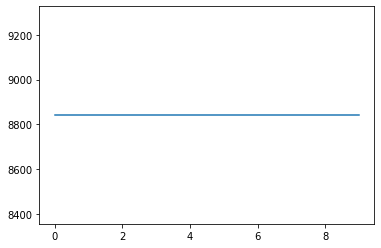

In [ ]:
#Plot for number of steps
plt.plot(variance_episodic_reward)
plt.show()

### Code for rendering 

In [ ]:
# Render an episode and save as a GIF file

display = Display(visible=0, size=(400, 300))
display.start()


def render_episode(env: gym.Env, model: tf.keras.Model, max_steps: int): 
  screen = env.render(mode='rgb_array')
  im = Image.fromarray(screen)

  images = [im]
  
  state = tf.constant(env.reset(), dtype=tf.float32)
  for i in range(1, max_steps + 1):
    state = tf.expand_dims(state, 0)
    action_probs, _ = model(state)
    action = np.argmax(np.squeeze(action_probs))
    state, _, done, _ = env.step(action)
    state = tf.constant(state, dtype=tf.float32)

    # Render screen every 10 steps
    if i % 10 == 0:
      screen = env.render(mode='rgb_array')
      images.append(Image.fromarray(screen))
  
    if done:
      break
  
  return images


# Save GIF image
images = render_episode(env, agent.ac_model, 200)
image_file = 'cartpole-v1.gif'
# loop=0: loop forever, duration=1: play each frame for 1ms
images[0].save(
    image_file, save_all=True, append_images=images[1:], loop=0, duration=1)


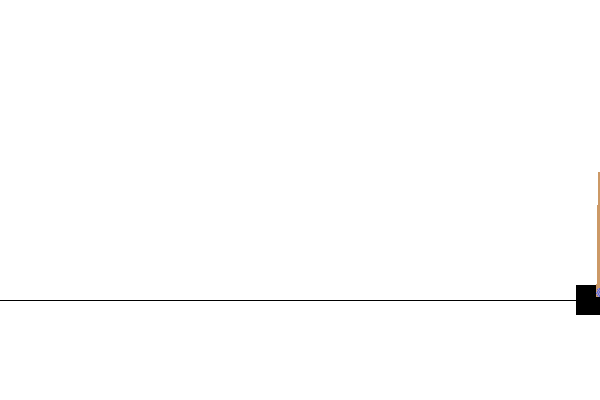

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(image_file)


### **Part 2: Full Step Actor-Critic Algorithm** 

In [ ]:
%%bash
# Install additional packages for visualization
sudo apt-get install -y xvfb python-opengl > /dev/null 2>&1
pip install pyvirtualdisplay > /dev/null 2>&1
pip install git+https://github.com/tensorflow/docs > /dev/null 2>&1

In [ ]:
import collections
import gym
import numpy as np
import statistics
import tensorflow as tf
import tqdm

from matplotlib import pyplot as plt
from tensorflow.keras import layers
from typing import Any, List, Sequence, Tuple


# Create the environment
env = gym.make("CartPole-v1")

# Set seed for experiment reproducibility
seed = 42
env.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

# Small epsilon value for stabilizing division operations
eps = np.finfo(np.float32).eps.item()

### Actor-Critic Model


In [ ]:
class ActorCritic(tf.keras.Model):
  """Combined actor-critic network."""

  def __init__(
      self, 
      num_actions: int, 
      num_hidden_units: int):
    """Initialize."""
    super().__init__()

    self.common = layers.Dense(num_hidden_units, activation="relu")
    self.actor = layers.Dense(num_actions)
    self.critic = layers.Dense(1)

  def call(self, inputs: tf.Tensor) -> Tuple[tf.Tensor, tf.Tensor]:
    x = self.common(inputs)
    return self.actor(x), self.critic(x)

In [ ]:
num_actions = env.action_space.n  # 2
num_hidden_units = 128

model = ActorCritic(num_actions, num_hidden_units)

### Training the full step actor-critic

In [ ]:
# Wrap OpenAI Gym's `env.step` call as an operation in a TensorFlow function.
# This would allow it to be included in a callable TensorFlow graph.

def env_step(action: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
  """Returns state, reward and done flag given an action."""

  state, reward, done, _ = env.step(action)
  return (state.astype(np.float32), 
          np.array(reward, np.int32), 
          np.array(done, np.int32))


def tf_env_step(action: tf.Tensor) -> List[tf.Tensor]:
  return tf.numpy_function(env_step, [action], 
                           [tf.float32, tf.int32, tf.int32])

In [ ]:
def run_episode(
    initial_state: tf.Tensor,  
    model: tf.keras.Model, 
    max_steps: int) -> Tuple[tf.Tensor, tf.Tensor, tf.Tensor]:
  """Runs a single episode to collect training data."""

  action_probs = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
  values = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
  rewards = tf.TensorArray(dtype=tf.int32, size=0, dynamic_size=True)

  initial_state_shape = initial_state.shape
  state = initial_state

  for t in tf.range(max_steps):
    # Convert state into a batched tensor (batch size = 1)
    state = tf.expand_dims(state, 0)
  
    # Run the model and to get action probabilities and critic value
    action_logits_t, value = model(state)
  
    # Sample next action from the action probability distribution
    action = tf.random.categorical(action_logits_t, 1)[0, 0]
    action_probs_t = tf.nn.softmax(action_logits_t)

    # Store critic values
    values = values.write(t, tf.squeeze(value))

    # Store log probability of the action chosen
    action_probs = action_probs.write(t, action_probs_t[0, action])
  
    # Apply action to the environment to get next state and reward
    state, reward, done = tf_env_step(action)
    state.set_shape(initial_state_shape)
  
    # Store reward
    rewards = rewards.write(t, reward)

    if tf.cast(done, tf.bool):
      break

  action_probs = action_probs.stack()
  values = values.stack()
  rewards = rewards.stack()
  
  return action_probs, values, rewards

### Computing expected returns

In [ ]:
def get_expected_return(
    rewards: tf.Tensor, 
    gamma: float, 
    standardize: bool = True) -> tf.Tensor:
  """Compute expected returns per timestep."""

  n = tf.shape(rewards)[0]
  returns = tf.TensorArray(dtype=tf.float32, size=n)

  # Start from the end of `rewards` and accumulate reward sums
  # into the `returns` array
  rewards = tf.cast(rewards[::-1], dtype=tf.float32)
  discounted_sum = tf.constant(0.0)
  discounted_sum_shape = discounted_sum.shape
  for i in tf.range(n):
    reward = rewards[i]
    discounted_sum = reward + gamma * discounted_sum
    discounted_sum.set_shape(discounted_sum_shape)
    returns = returns.write(i, discounted_sum)
  returns = returns.stack()[::-1]

  if standardize:
    returns = ((returns - tf.math.reduce_mean(returns)) / 
               (tf.math.reduce_std(returns) + eps))

  return returns

### Actor-critic loss

In [ ]:
huber_loss = tf.keras.losses.Huber(reduction=tf.keras.losses.Reduction.SUM)

def compute_loss(
    action_probs: tf.Tensor,  
    values: tf.Tensor,  
    returns: tf.Tensor) -> tf.Tensor:
  """Computes the combined actor-critic loss."""

  advantage = returns - values

  action_log_probs = tf.math.log(action_probs)
  actor_loss = -tf.math.reduce_sum(action_log_probs * advantage)

  critic_loss = huber_loss(values, returns)

  return actor_loss + critic_loss

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)


@tf.function
def train_step(
    initial_state: tf.Tensor, 
    model: tf.keras.Model, 
    optimizer: tf.keras.optimizers.Optimizer, 
    gamma: float, 
    max_steps_per_episode: int) -> tf.Tensor:
  """Runs a model training step."""

  with tf.GradientTape() as tape:

    # Run the model for one episode to collect training data
    action_probs, values, rewards = run_episode(
        initial_state, model, max_steps_per_episode) 

    # Calculate expected returns
    returns = get_expected_return(rewards, gamma)

    # Convert training data to appropriate TF tensor shapes
    action_probs, values, returns = [
        tf.expand_dims(x, 1) for x in [action_probs, values, returns]] 

    # Calculating loss values to update our network
    loss = compute_loss(action_probs, values, returns)

  # Compute the gradients from the loss
  grads = tape.gradient(loss, model.trainable_variables)

  # Apply the gradients to the model's parameters
  optimizer.apply_gradients(zip(grads, model.trainable_variables))

  episode_reward = tf.math.reduce_sum(rewards)

  return episode_reward

### Training Loop

#######################################
############# Starting Experiment  0 #############
#######################################


Episode 999: 100%|██████████| 1000/1000 [02:41<00:00,  6.19it/s, episode_reward=500, running_reward=299]


 Variance of the 0th run is33211.169195999995

Solved at episode 0: average reward: 299.30!


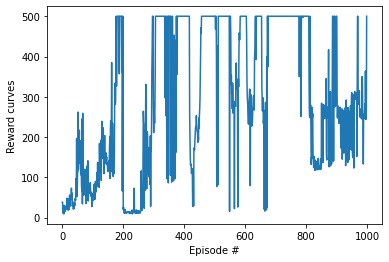

#######################################
############# Starting Experiment  1 #############
#######################################


Episode 999: 100%|██████████| 1000/1000 [03:04<00:00,  5.42it/s, episode_reward=83, running_reward=395]



 Variance of the 1th run is27843.375375

Solved at episode 1: average reward: 395.48!


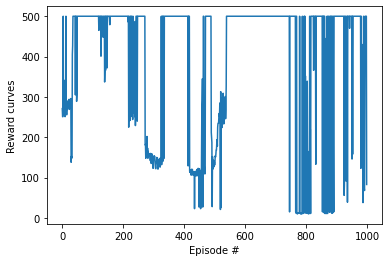

#######################################
############# Starting Experiment  2 #############
#######################################


Episode 999: 100%|██████████| 1000/1000 [03:26<00:00,  4.83it/s, episode_reward=500, running_reward=438]


 Variance of the 2th run is14764.830774999999

Solved at episode 2: average reward: 437.58!


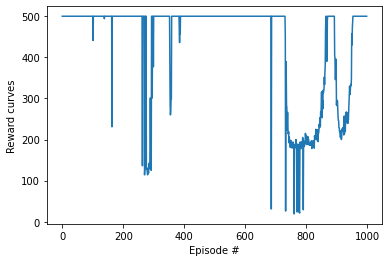

#######################################
############# Starting Experiment  3 #############
#######################################


Episode 999: 100%|██████████| 1000/1000 [03:25<00:00,  4.87it/s, episode_reward=321, running_reward=444]



 Variance of the 3th run is13083.039663999998

Solved at episode 3: average reward: 443.66!


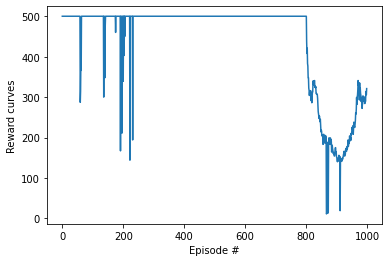

#######################################
############# Starting Experiment  4 #############
#######################################


Episode 999: 100%|██████████| 1000/1000 [03:45<00:00,  4.44it/s, episode_reward=500, running_reward=487]


 Variance of the 4th run is2073.716239

Solved at episode 4: average reward: 487.07!


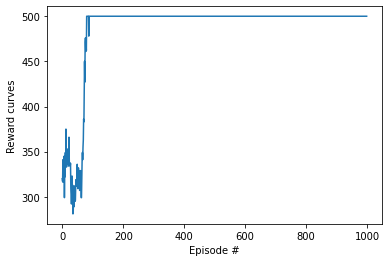

#######################################
############# Starting Experiment  5 #############
#######################################


Episode 999: 100%|██████████| 1000/1000 [03:50<00:00,  4.35it/s, episode_reward=500, running_reward=499]


 Variance of the 5th run is443.9999189999999

Solved at episode 5: average reward: 498.74!


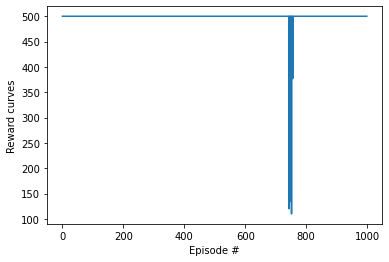

#######################################
############# Starting Experiment  6 #############
#######################################


Episode 999: 100%|██████████| 1000/1000 [03:26<00:00,  4.84it/s, episode_reward=500, running_reward=448]


 Variance of the 6th run is16300.961039000002

Solved at episode 6: average reward: 447.53!


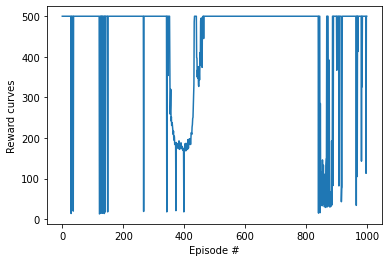

#######################################
############# Starting Experiment  7 #############
#######################################


Episode 999: 100%|██████████| 1000/1000 [03:50<00:00,  4.34it/s, episode_reward=500, running_reward=500]


 Variance of the 7th run is4.975199000000001

Solved at episode 7: average reward: 499.90!


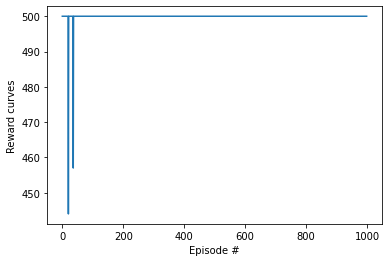

#######################################
############# Starting Experiment  8 #############
#######################################


Episode 999: 100%|██████████| 1000/1000 [03:45<00:00,  4.43it/s, episode_reward=500, running_reward=492]


 Variance of the 8th run is2883.7764759999986

Solved at episode 8: average reward: 491.72!


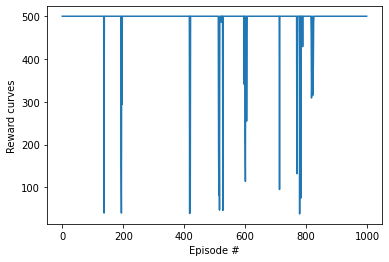

#######################################
############# Starting Experiment  9 #############
#######################################


Episode 999: 100%|██████████| 1000/1000 [03:35<00:00,  4.65it/s, episode_reward=131, running_reward=470]



 Variance of the 9th run is10629.525799000003

Solved at episode 9: average reward: 469.60!


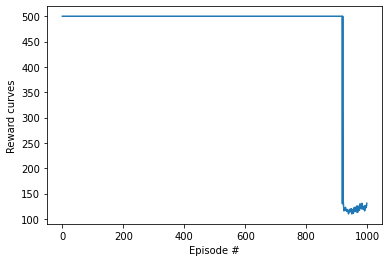

[33211.169195999995, 27843.375375, 14764.830774999999, 13083.039663999998, 2073.716239, 443.9999189999999, 16300.961039000002, 4.975199000000001, 2883.7764759999986, 10629.525799000003]


In [ ]:
experiments=10
variance_episodic_reward=[]
total_experiment_running_reward=[]
for i in range(experiments):
  print("#######################################")
  print("############# Starting Experiment ",i,"#############")
  print("#######################################")
  min_episodes_criterion = 1000
  max_episodes = 1000
  reward_list = []
  max_steps_per_episode = 1000
  reward_threshold = 195
  running_reward = 0
  total_episodic_reward=[]
  total_running_reward=np.zeros(max_episodes)
  
# Discount factor for future rewards
  gamma = 0.99

# Keep last episodes reward
  episodes_reward: collections.deque = collections.deque(maxlen=min_episodes_criterion)

  with tqdm.trange(max_episodes) as t:
    for j in t:
      initial_state = tf.constant(env.reset(), dtype=tf.float32)
      episode_reward = int(train_step(
         initial_state, model, optimizer, gamma, max_steps_per_episode))
    
      episodes_reward.append(episode_reward)
      reward_list.append(episode_reward) 
      running_reward = statistics.mean(episodes_reward)
      total_episodic_reward.append(episode_reward)
      total_running_reward[j] = running_reward
      #total_experiment_running_reward.append(np.array(total_running_reward))


  
      t.set_description(f'Episode {j}')
      t.set_postfix(
        episode_reward=episode_reward, running_reward=running_reward)
  
    # Show average episode reward every 10 episodes
      if i % 10 == 0:
        pass # print(f'Episode {i}: average reward: {avg_reward}')
  
      if running_reward > reward_threshold and j >= min_episodes_criterion:  
         break
    
  total_experiment_running_reward.append(total_running_reward)

  variance=np.var(total_episodic_reward)
  variance_episodic_reward.append(variance)
  print(f'\n Variance of the {i}th run is{variance}')
  print(f'\nSolved at episode {i}: average reward: {running_reward:.2f}!')

  #Plot for Rewards for each episode
  plt.plot(total_episodic_reward)
  plt.ylabel('Reward curves')
  plt.xlabel('Episode #')
  plt.show()
print(variance_episodic_reward)



### Plotting the variance

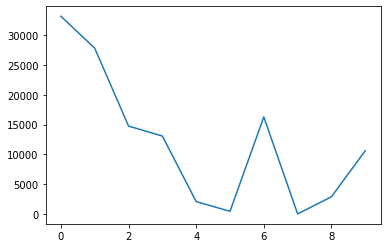

In [ ]:
#Plot for number of steps
plt.plot(variance_episodic_reward)
plt.show()


Render the environment

In [ ]:
# Render an episode and save as a GIF file

display = Display(visible=0, size=(400, 300))
display.start()


def render_episode(env: gym.Env, model: tf.keras.Model, max_steps: int): 
  screen = env.render(mode='rgb_array')
  im = Image.fromarray(screen)

  images = [im]
  
  state = tf.constant(env.reset(), dtype=tf.float32)
  for i in range(1, max_steps + 1):
    state = tf.expand_dims(state, 0)
    action_probs, _ = model(state)
    action = np.argmax(np.squeeze(action_probs))
    state, _, done, _ = env.step(action)
    state = tf.constant(state, dtype=tf.float32)

    # Render screen every 10 steps
    if i % 10 == 0:
      screen = env.render(mode='rgb_array')
      images.append(Image.fromarray(screen))
  
    if done:
      break
  
  return images


# Save GIF image
images = render_episode(env, agent.ac_model, 200)
image_file = 'cartpole-v1.gif'
# loop=0: loop forever, duration=1: play each frame for 1ms
images[0].save(
    image_file, save_all=True, append_images=images[1:], loop=0, duration=1)


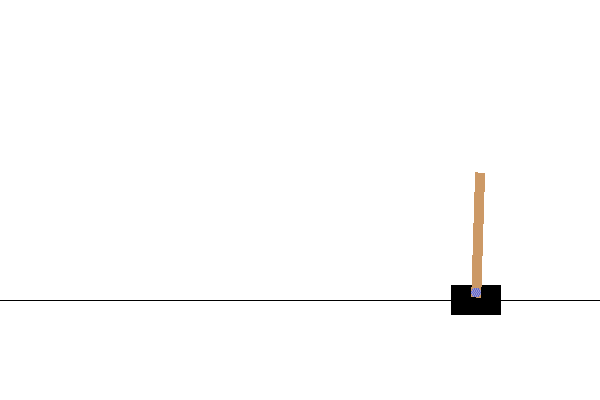

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(image_file)


### **Part 3: N-Step Actor-Critic Algorithm**   
### Where n = 8

In [ ]:
from re import S
class Agent:
    """
    Agent class
    """
    def __init__(self, action_size, lr=0.001, gamma=0.99, seed = 42):
        self.gamma = gamma
        self.ac_model = ActorCriticModel(action_size=action_size)
        self.ac_model.compile(tf.keras.optimizers.Adam(learning_rate=lr))
        np.random.seed(seed)
    
    def sample_action(self, state):
        """
        Given a state, compute the policy distribution over all actions and sample one action
        """
        pi,_ = self.ac_model(state)

        action_probabilities = tfp.distributions.Categorical(probs=pi)
        sample = action_probabilities.sample()

        return int(sample.numpy()[0])

    def actor_loss(self, action, pi, delta):
        """
        Compute Actor Loss
        """
        return -tf.math.log(pi[0,action]) * delta

    def critic_loss(self,delta):
        """
        Critic loss aims to minimize TD error
        """
        return delta**2

    @tf.function
    def learn(self, state, action, reward, next_state, done):
        """
        For a given transition (s,a,s',r) update the paramters by computing the
        gradient of the total loss
        """
        with tf.GradientTape(persistent=True) as tape:
            pi, V_s = self.ac_model(state)
            _, V_s_next = self.ac_model(next_state)

            ##Add this line
            #V_s_next = tf.stop_gradient(V_s_next)

            V_s = tf.squeeze(V_s)
            V_s_next = tf.squeeze(V_s_next)
            

            #### TO DO: Write the equation for delta (TD error)
            ## Write code below
            delta = reward + ((self.gamma**8) * V_s_next) - V_s

            loss_a = self.actor_loss(action, pi, delta)
            loss_c =self.critic_loss(delta)
            loss_total = loss_a + loss_c

        gradient = tape.gradient(loss_total, self.ac_model.trainable_variables)
        self.ac_model.optimizer.apply_gradients(zip(gradient, self.ac_model.trainable_variables))

#######################################
############# Starting Experiment  0 #############
#######################################


/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Episode  10 Reward 22.244526 AVERAGE Reward 19.371984
Episode  20 Reward 20.352056 AVERAGE Reward 22.349718
Episode  30 Reward 114.950893 AVERAGE Reward 27.270245
Episode  40 Reward 46.353183 AVERAGE Reward 17.114547
Episode  50 Reward 21.303046 AVERAGE Reward 11.733985
Episode  60 Reward 17.441061 AVERAGE Reward 13.573141
Episode  70 Reward 19.391460 AVERAGE Reward 14.043743
Episode  80 Reward 20.352056 AVERAGE Reward 14.334824
Episode  90 Reward 16.451061 AVERAGE Reward 10.079292
Episode  100 Reward 19.391460 AVERAGE Reward 14.526119

 Variance of the 8th run is75.33343977881692

 Episode 100: average reward: 16.44!


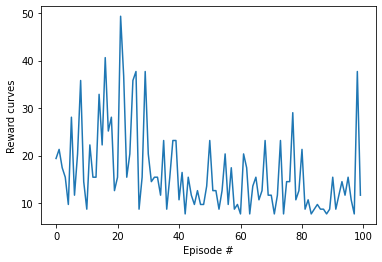

#######################################
############# Starting Experiment  1 #############
#######################################
Episode  10 Reward 16.451061 AVERAGE Reward 10.957531
Episode  20 Reward 16.451061 AVERAGE Reward 11.728133
Episode  30 Reward 109.157428 AVERAGE Reward 15.500563
Episode  40 Reward 73.470174 AVERAGE Reward 17.828024
Episode  50 Reward 42.568052 AVERAGE Reward 16.083773
Episode  60 Reward 18.421161 AVERAGE Reward 14.923021
Episode  70 Reward 43.528648 AVERAGE Reward 11.520399
Episode  80 Reward 19.391460 AVERAGE Reward 12.975239
Episode  90 Reward 7.725531 AVERAGE Reward 11.822339
Episode  100 Reward 18.421161 AVERAGE Reward 13.955516

 Variance of the 8th run is36.91395245157398

 Episode 100: average reward: 13.73!


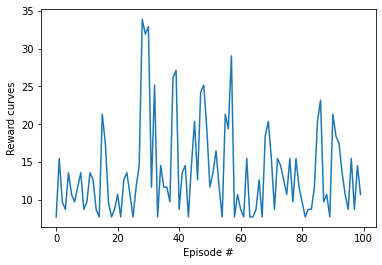

#######################################
############# Starting Experiment  2 #############
#######################################
Episode  10 Reward 17.441061 AVERAGE Reward 10.379203
Episode  20 Reward 7.725531 AVERAGE Reward 11.528202
Episode  30 Reward 23.176592 AVERAGE Reward 13.949869
Episode  40 Reward 41.597753 AVERAGE Reward 10.767352
Episode  50 Reward 19.391460 AVERAGE Reward 19.931147
Episode  60 Reward 71.519775 AVERAGE Reward 15.406406
Episode  70 Reward 16.451061 AVERAGE Reward 19.653507
Episode  80 Reward 16.451061 AVERAGE Reward 14.340784
Episode  90 Reward 41.597753 AVERAGE Reward 12.579346
Episode  100 Reward 72.499875 AVERAGE Reward 13.276189

 Variance of the 8th run is44.243035346280315

 Episode 100: average reward: 14.18!


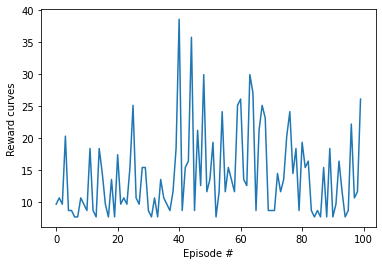

#######################################
############# Starting Experiment  3 #############
#######################################
Episode  10 Reward 73.470174 AVERAGE Reward 19.466367
Episode  20 Reward 23.176592 AVERAGE Reward 15.894623
Episode  30 Reward 40.617653 AVERAGE Reward 14.820345
Episode  40 Reward 19.391460 AVERAGE Reward 18.108420
Episode  50 Reward 70.529775 AVERAGE Reward 16.455667
Episode  60 Reward 18.421161 AVERAGE Reward 14.045899
Episode  70 Reward 16.451061 AVERAGE Reward 15.512326
Episode  80 Reward 16.451061 AVERAGE Reward 13.552596
Episode  90 Reward 39.627653 AVERAGE Reward 12.691952
Episode  100 Reward 17.441061 AVERAGE Reward 12.995647

 Variance of the 8th run is34.00213525188239

 Episode 100: average reward: 15.35!


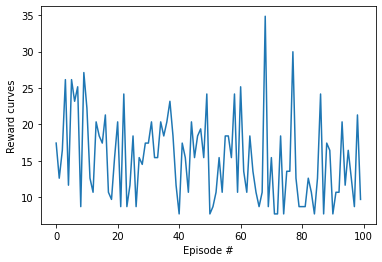

#######################################
############# Starting Experiment  4 #############
#######################################
Episode  10 Reward 40.617653 AVERAGE Reward 15.787908
Episode  20 Reward 73.470174 AVERAGE Reward 15.606435
Episode  30 Reward 43.528648 AVERAGE Reward 16.174184
Episode  40 Reward 45.421118 AVERAGE Reward 18.098746
Episode  50 Reward 41.597753 AVERAGE Reward 15.597691
Episode  60 Reward 20.352056 AVERAGE Reward 13.181051
Episode  70 Reward 7.725531 AVERAGE Reward 12.984865
Episode  80 Reward 23.176592 AVERAGE Reward 14.927805
Episode  90 Reward 18.421161 AVERAGE Reward 13.080199
Episode  100 Reward 16.451061 AVERAGE Reward 10.659687

 Variance of the 8th run is32.4282236785978

 Episode 100: average reward: 14.61!


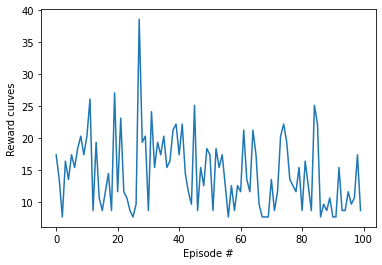

#######################################
############# Starting Experiment  5 #############
#######################################
Episode  10 Reward 16.451061 AVERAGE Reward 10.281173
Episode  20 Reward 17.441061 AVERAGE Reward 10.473293
Episode  30 Reward 17.441061 AVERAGE Reward 13.759495
Episode  40 Reward 18.421161 AVERAGE Reward 11.920135
Episode  50 Reward 18.421161 AVERAGE Reward 14.144704
Episode  60 Reward 43.528648 AVERAGE Reward 18.192874
Episode  70 Reward 23.176592 AVERAGE Reward 12.979179
Episode  80 Reward 42.568052 AVERAGE Reward 13.654722
Episode  90 Reward 42.568052 AVERAGE Reward 19.169357
Episode  100 Reward 23.176592 AVERAGE Reward 19.364163

 Variance of the 8th run is33.61937350998485

 Episode 100: average reward: 14.39!


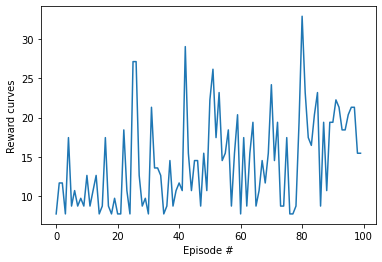

#######################################
############# Starting Experiment  6 #############
#######################################
Episode  10 Reward 41.597753 AVERAGE Reward 17.033103
Episode  20 Reward 7.725531 AVERAGE Reward 12.980974
Episode  30 Reward 16.451061 AVERAGE Reward 13.460604
Episode  40 Reward 19.391460 AVERAGE Reward 15.391878
Episode  50 Reward 70.529775 AVERAGE Reward 12.406548
Episode  60 Reward 39.627653 AVERAGE Reward 17.134064
Episode  70 Reward 71.519775 AVERAGE Reward 22.252678
Episode  80 Reward 16.451061 AVERAGE Reward 17.735866
Episode  90 Reward 19.391460 AVERAGE Reward 17.631936
Episode  100 Reward 39.627653 AVERAGE Reward 15.210464

 Variance of the 8th run is40.64814506433984

 Episode 100: average reward: 16.12!


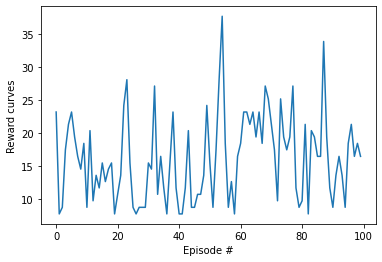

#######################################
############# Starting Experiment  7 #############
#######################################
Episode  10 Reward 43.528648 AVERAGE Reward 18.577180
Episode  20 Reward 43.528648 AVERAGE Reward 18.686816
Episode  30 Reward 18.421161 AVERAGE Reward 11.641895
Episode  40 Reward 23.176592 AVERAGE Reward 16.932153
Episode  50 Reward 44.479638 AVERAGE Reward 20.706407
Episode  60 Reward 72.499875 AVERAGE Reward 19.838009
Episode  70 Reward 45.421118 AVERAGE Reward 17.732672
Episode  80 Reward 46.353183 AVERAGE Reward 20.030069
Episode  90 Reward 45.421118 AVERAGE Reward 21.381950
Episode  100 Reward 46.353183 AVERAGE Reward 21.281175

 Variance of the 8th run is43.61680827284266

 Episode 100: average reward: 18.68!


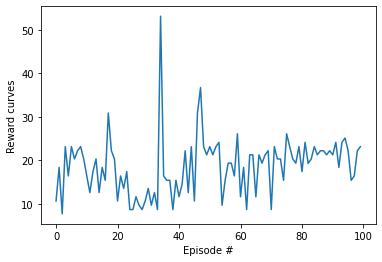

#######################################
############# Starting Experiment  8 #############
#######################################
Episode  10 Reward 40.617653 AVERAGE Reward 17.723114
Episode  20 Reward 17.441061 AVERAGE Reward 16.266442
Episode  30 Reward 7.725531 AVERAGE Reward 10.262677
Episode  40 Reward 16.451061 AVERAGE Reward 8.424531
Episode  50 Reward 7.725531 AVERAGE Reward 8.125531
Episode  60 Reward 7.725531 AVERAGE Reward 8.025531
Episode  70 Reward 7.725531 AVERAGE Reward 8.224531
Episode  80 Reward 16.451061 AVERAGE Reward 8.125531
Episode  90 Reward 7.725531 AVERAGE Reward 8.425531
Episode  100 Reward 7.725531 AVERAGE Reward 8.224531

 Variance of the 8th run is22.224349861846882

 Episode 100: average reward: 10.18!


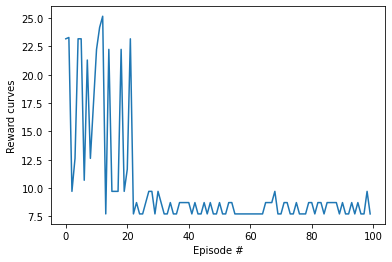

#######################################
############# Starting Experiment  9 #############
#######################################
Episode  10 Reward 7.725531 AVERAGE Reward 8.324531
Episode  20 Reward 17.441061 AVERAGE Reward 8.223531
Episode  30 Reward 7.725531 AVERAGE Reward 8.124531
Episode  40 Reward 7.725531 AVERAGE Reward 8.224531
Episode  50 Reward 7.725531 AVERAGE Reward 8.325531
Episode  60 Reward 7.725531 AVERAGE Reward 8.025531
Episode  70 Reward 7.725531 AVERAGE Reward 8.223531
Episode  80 Reward 7.725531 AVERAGE Reward 8.125531
Episode  90 Reward 7.725531 AVERAGE Reward 8.125531
Episode  100 Reward 7.725531 AVERAGE Reward 8.224531

 Variance of the 8th run is0.40665935999999936

 Episode 100: average reward: 8.19!


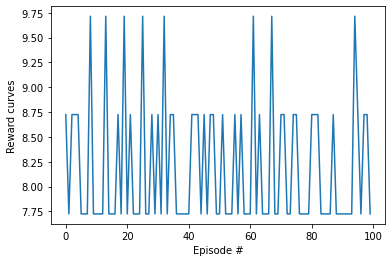

[75.33343977881692, 36.91395245157398, 44.243035346280315, 34.00213525188239, 32.4282236785978, 33.61937350998485, 40.64814506433984, 43.61680827284266, 22.224349861846882, 0.40665935999999936]


In [ ]:
env = gym.make('CartPole-v1')
import collections
import statistics
#Initializing Agent
agent = Agent(lr=0.001, action_size=env.action_space.n)
#Number of episodes
max_episodes = 100
tf.compat.v1.reset_default_graph()
reward_list = []
average_reward_list = []
begin_time = datetime.datetime.now()

reward_n = []
done_n = []
state_n = []
total_running_reward = []

experiments=10

variance_episodic_reward=[]
nVal = [8]
total_experiment_running_reward=[]
episodes_reward = []
sumRewards = 0
for n_steps in nVal:
  for i in range(experiments):
      print("#######################################")
      print("############# Starting Experiment ",i,"#############")
      print("#######################################")
      running_reward = 0
      total_episodic_reward=[]
      total_running_reward=np.zeros(max_episodes+1)
      episodes_reward: collections.deque = collections.deque(maxlen=max_episodes+1)

      for ep in range(1, max_episodes + 1):
          state = env.reset().reshape(1,-1)
          done = False
          stateLast = state
          ep_rew = 0
          sumRewards = 0
          while not done:
              for i in range(1,n_steps+1):  
                action = agent.sample_action(stateLast) ##Sample Action
                next_state, reward, done, info = env.step(action) ##Take action
                next_state = next_state.reshape(1,-1)
                reward_n = (0.99**(i-1)) * reward
                sumRewards += reward_n
                done_n.append(done)
                state_n.append(next_state)
                stateLast = next_state
              
              action = agent.sample_action(stateLast) ##Sample Action
              next_state, reward, done, info = env.step(action) ##Take action
              next_state = next_state.reshape(1,-1)
              stateLast = stateLast.reshape(1,-1)
              ep_rew += sumRewards
              agent.learn(state, action, sumRewards, stateLast, done) ##Update Parameters
              state = next_state ##Updating State
          reward_list.append(sumRewards)
          episodes_reward.append(sumRewards)
          running_reward = statistics.mean(episodes_reward)
          total_episodic_reward.append(sumRewards)
          total_running_reward[ep] = running_reward


          if ep % 10 == 0:
              avg_rew = np.mean(reward_list[-10:])
              print('Episode ', ep, 'Reward %f' % ep_rew,'AVERAGE Reward %f' % avg_rew)
          if ep % 100:
              avg_100 =  np.mean(reward_list[-100:])
              if avg_100 > 195.0:
                  print('Stopped at Episode ',ep)
                  break
          variance=np.var(total_episodic_reward)
      total_experiment_running_reward.append(total_running_reward)
      
      variance_episodic_reward.append(variance)
      print(f'\n Variance of the {i}th run is{variance}')
      print(f'\n Episode {ep}: average reward: {running_reward:.2f}!')
      
      #Plot for Rewards for each episode
      plt.plot(total_episodic_reward)
      plt.ylabel('Reward curves')
      plt.xlabel('Episode #')
      plt.show()
  print(variance_episodic_reward)

### Plot for variance

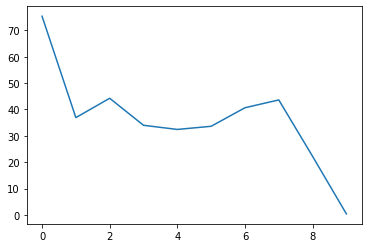

In [ ]:
#Plot for variance_episodic_reward
plt.plot(variance_episodic_reward)
plt.show()

### Code for rendering 

In [ ]:
# Render an episode and save as a GIF file

display = Display(visible=0, size=(400, 300))
display.start()


def render_episode(env: gym.Env, model: tf.keras.Model, max_steps: int): 
  screen = env.render(mode='rgb_array')
  im = Image.fromarray(screen)

  images = [im]
  
  state = tf.constant(env.reset(), dtype=tf.float32)
  for i in range(1, max_steps + 1):
    state = tf.expand_dims(state, 0)
    action_probs, _ = model(state)
    action = np.argmax(np.squeeze(action_probs))
    state, _, done, _ = env.step(action)
    state = tf.constant(state, dtype=tf.float32)

    # Render screen every 10 steps
    if i % 10 == 0:
      screen = env.render(mode='rgb_array')
      images.append(Image.fromarray(screen))
  
    if done:
      break
  
  return images


# Save GIF image
images = render_episode(env, agent.ac_model, 200)
image_file = 'cartpole-v1.gif'
# loop=0: loop forever, duration=1: play each frame for 1ms
images[0].save(
    image_file, save_all=True, append_images=images[1:], loop=0, duration=1)


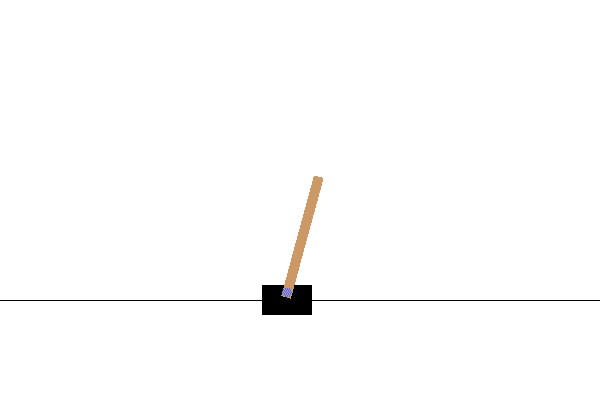

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(image_file)

### Part 3 - For n-step where n=4

In [ ]:
from re import S
class Agent:
    """
    Agent class
    """
    def __init__(self, action_size, lr=0.001, gamma=0.99, seed = 42):
        self.gamma = gamma
        self.ac_model = ActorCriticModel(action_size=action_size)
        self.ac_model.compile(tf.keras.optimizers.Adam(learning_rate=lr))
        np.random.seed(seed)
    
    def sample_action(self, state):
        """
        Given a state, compute the policy distribution over all actions and sample one action
        """
        pi,_ = self.ac_model(state)

        action_probabilities = tfp.distributions.Categorical(probs=pi)
        sample = action_probabilities.sample()

        return int(sample.numpy()[0])

    def actor_loss(self, action, pi, delta):
        """
        Compute Actor Loss
        """
        return -tf.math.log(pi[0,action]) * delta

    def critic_loss(self,delta):
        """
        Critic loss aims to minimize TD error
        """
        return delta**2

    @tf.function
    def learn(self, state, action, reward, next_state, done):
        """
        For a given transition (s,a,s',r) update the paramters by computing the
        gradient of the total loss
        """
        with tf.GradientTape(persistent=True) as tape:
            pi, V_s = self.ac_model(state)
            _, V_s_next = self.ac_model(next_state)

            ##Add this line
            #V_s_next = tf.stop_gradient(V_s_next)

            V_s = tf.squeeze(V_s)
            V_s_next = tf.squeeze(V_s_next)
            

            #### TO DO: Write the equation for delta (TD error)
            ## Write code below
            delta = reward + ((self.gamma**4) * V_s_next) - V_s

            loss_a = self.actor_loss(action, pi, delta)
            loss_c =self.critic_loss(delta)
            loss_total = loss_a + loss_c

        gradient = tape.gradient(loss_total, self.ac_model.trainable_variables)
        self.ac_model.optimizer.apply_gradients(zip(gradient, self.ac_model.trainable_variables))

#######################################
############# Starting Experiment  0 #############
#######################################


/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Episode  10 Reward 176.347656 AVERAGE Reward 19.910875
Episode  20 Reward 10.850898 AVERAGE Reward 9.171818
Episode  30 Reward 11.821197 AVERAGE Reward 10.644018
Episode  40 Reward 108.380773 AVERAGE Reward 11.731117
Episode  50 Reward 21.691995 AVERAGE Reward 11.140028
Episode  60 Reward 21.691995 AVERAGE Reward 10.549958
Episode  70 Reward 11.821197 AVERAGE Reward 9.855958
Episode  80 Reward 11.821197 AVERAGE Reward 8.674818
Episode  90 Reward 21.691995 AVERAGE Reward 10.449978
Episode  100 Reward 37.453591 AVERAGE Reward 10.348998

 Variance of the 4th run is29.09944777648153

Solved at episode 4: average reward: 11.25!


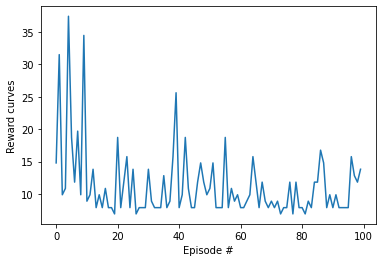

#######################################
############# Starting Experiment  1 #############
#######################################
Episode  10 Reward 20.701995 AVERAGE Reward 10.742047
Episode  20 Reward 20.701995 AVERAGE Reward 9.758928
Episode  30 Reward 22.672095 AVERAGE Reward 8.968858
Episode  40 Reward 11.821197 AVERAGE Reward 9.068858
Episode  50 Reward 20.701995 AVERAGE Reward 10.155938
Episode  60 Reward 38.433691 AVERAGE Reward 9.463888
Episode  70 Reward 11.821197 AVERAGE Reward 9.073818
Episode  80 Reward 11.821197 AVERAGE Reward 9.856938
Episode  90 Reward 36.463591 AVERAGE Reward 11.537057
Episode  100 Reward 39.403990 AVERAGE Reward 9.561898

 Variance of the 4th run is6.125225032250881

Solved at episode 4: average reward: 9.82!


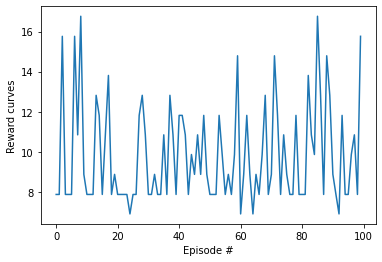

#######################################
############# Starting Experiment  2 #############
#######################################
Episode  10 Reward 10.850898 AVERAGE Reward 9.461898
Episode  20 Reward 23.642394 AVERAGE Reward 9.658928
Episode  30 Reward 59.105985 AVERAGE Reward 12.918157
Episode  40 Reward 21.691995 AVERAGE Reward 8.873818
Episode  50 Reward 23.642394 AVERAGE Reward 11.629127
Episode  60 Reward 10.850898 AVERAGE Reward 9.661898
Episode  70 Reward 11.821197 AVERAGE Reward 9.563888
Episode  80 Reward 36.463591 AVERAGE Reward 12.815217
Episode  90 Reward 11.821197 AVERAGE Reward 8.867878
Episode  100 Reward 79.807980 AVERAGE Reward 10.944037

 Variance of the 4th run is16.72354733617493

Solved at episode 4: average reward: 10.44!


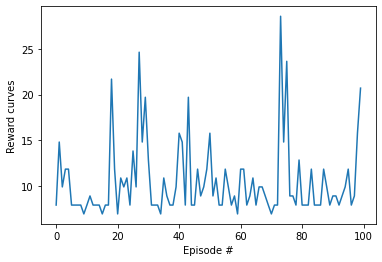

#######################################
############# Starting Experiment  3 #############
#######################################
Episode  10 Reward 21.691995 AVERAGE Reward 9.266858
Episode  20 Reward 22.672095 AVERAGE Reward 12.025137
Episode  30 Reward 36.463591 AVERAGE Reward 10.057928
Episode  40 Reward 39.403990 AVERAGE Reward 10.448998
Episode  50 Reward 11.821197 AVERAGE Reward 11.238077
Episode  60 Reward 36.463591 AVERAGE Reward 8.874838
Episode  70 Reward 20.701995 AVERAGE Reward 8.679778
Episode  80 Reward 23.642394 AVERAGE Reward 10.349978
Episode  90 Reward 21.691995 AVERAGE Reward 9.071838
Episode  100 Reward 21.691995 AVERAGE Reward 10.254938

 Variance of the 4th run is8.821164611314522

Solved at episode 4: average reward: 10.03!


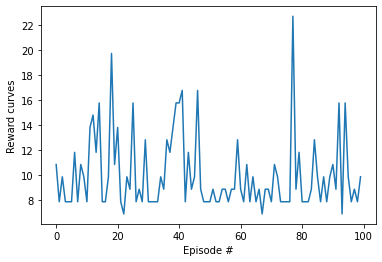

#######################################
############# Starting Experiment  4 #############
#######################################
Episode  10 Reward 20.701995 AVERAGE Reward 10.061868
Episode  20 Reward 11.821197 AVERAGE Reward 12.913217
Episode  30 Reward 21.691995 AVERAGE Reward 8.481768
Episode  40 Reward 11.821197 AVERAGE Reward 9.959898
Episode  50 Reward 11.821197 AVERAGE Reward 9.758928
Episode  60 Reward 11.821197 AVERAGE Reward 9.270838
Episode  70 Reward 36.463591 AVERAGE Reward 9.070848
Episode  80 Reward 10.850898 AVERAGE Reward 9.068858
Episode  90 Reward 11.821197 AVERAGE Reward 8.576788
Episode  100 Reward 23.642394 AVERAGE Reward 9.560918

 Variance of the 4th run is8.543807340029584

Solved at episode 4: average reward: 9.67!


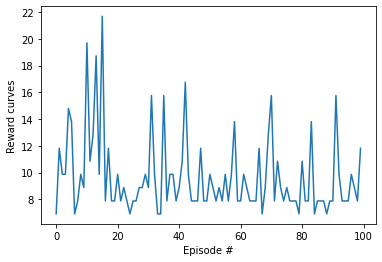

#######################################
############# Starting Experiment  5 #############
#######################################
Episode  10 Reward 23.642394 AVERAGE Reward 9.758908
Episode  20 Reward 20.701995 AVERAGE Reward 9.266878
Episode  30 Reward 21.691995 AVERAGE Reward 11.632117
Episode  40 Reward 20.701995 AVERAGE Reward 14.390377
Episode  50 Reward 21.691995 AVERAGE Reward 11.636057
Episode  60 Reward 10.850898 AVERAGE Reward 14.491347
Episode  70 Reward 11.821197 AVERAGE Reward 10.452968
Episode  80 Reward 23.642394 AVERAGE Reward 11.235087
Episode  90 Reward 79.807980 AVERAGE Reward 14.783436
Episode  100 Reward 11.821197 AVERAGE Reward 9.658928

 Variance of the 4th run is31.368613801012476

Solved at episode 4: average reward: 11.73!


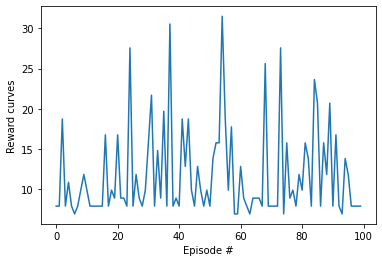

#######################################
############# Starting Experiment  6 #############
#######################################
Episode  10 Reward 20.701995 AVERAGE Reward 11.430127
Episode  20 Reward 11.821197 AVERAGE Reward 12.519177
Episode  30 Reward 38.433691 AVERAGE Reward 12.320177
Episode  40 Reward 37.453591 AVERAGE Reward 12.813237
Episode  50 Reward 10.850898 AVERAGE Reward 12.318207
Episode  60 Reward 21.691995 AVERAGE Reward 10.947958
Episode  70 Reward 21.691995 AVERAGE Reward 10.646008
Episode  80 Reward 11.821197 AVERAGE Reward 10.844037
Episode  90 Reward 110.331172 AVERAGE Reward 11.927137
Episode  100 Reward 11.821197 AVERAGE Reward 11.235087

 Variance of the 4th run is26.448575446539177

Solved at episode 4: average reward: 11.70!


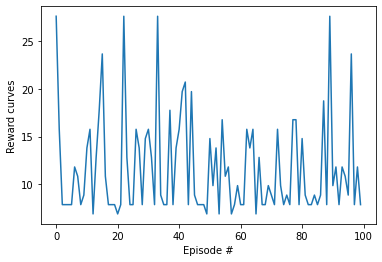

#######################################
############# Starting Experiment  7 #############
#######################################
Episode  10 Reward 11.821197 AVERAGE Reward 12.318207
Episode  20 Reward 11.821197 AVERAGE Reward 10.155928
Episode  30 Reward 11.821197 AVERAGE Reward 8.476808
Episode  40 Reward 23.642394 AVERAGE Reward 10.248008
Episode  50 Reward 23.642394 AVERAGE Reward 9.168848
Episode  60 Reward 56.165586 AVERAGE Reward 11.238077
Episode  70 Reward 11.821197 AVERAGE Reward 10.250998
Episode  80 Reward 11.821197 AVERAGE Reward 12.714237
Episode  90 Reward 20.701995 AVERAGE Reward 10.348007
Episode  100 Reward 11.821197 AVERAGE Reward 9.266858

 Variance of the 4th run is13.17983786985482

Solved at episode 4: average reward: 10.42!


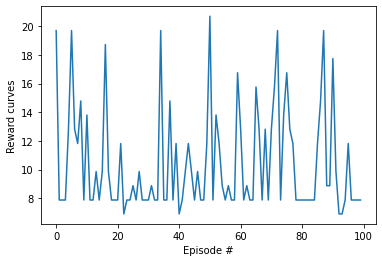

#######################################
############# Starting Experiment  8 #############
#######################################
Episode  10 Reward 38.433691 AVERAGE Reward 10.741047
Episode  20 Reward 36.463591 AVERAGE Reward 8.970848
Episode  30 Reward 23.642394 AVERAGE Reward 9.459928
Episode  40 Reward 20.701995 AVERAGE Reward 8.868878
Episode  50 Reward 36.463591 AVERAGE Reward 8.868878
Episode  60 Reward 11.821197 AVERAGE Reward 10.255918
Episode  70 Reward 11.821197 AVERAGE Reward 10.152948
Episode  80 Reward 23.642394 AVERAGE Reward 8.969848
Episode  90 Reward 38.433691 AVERAGE Reward 9.170808
Episode  100 Reward 11.821197 AVERAGE Reward 8.376808

 Variance of the 4th run is6.872330499342777

Solved at episode 4: average reward: 9.38!


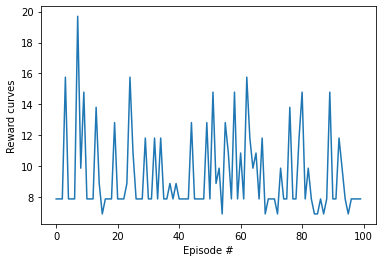

#######################################
############# Starting Experiment  9 #############
#######################################
Episode  10 Reward 11.821197 AVERAGE Reward 8.281768
Episode  20 Reward 11.821197 AVERAGE Reward 8.481748
Episode  30 Reward 10.850898 AVERAGE Reward 8.083768
Episode  40 Reward 11.821197 AVERAGE Reward 7.589708
Episode  50 Reward 10.850898 AVERAGE Reward 8.083748
Episode  60 Reward 11.821197 AVERAGE Reward 7.980798
Episode  70 Reward 11.821197 AVERAGE Reward 7.985738
Episode  80 Reward 11.821197 AVERAGE Reward 8.377808
Episode  90 Reward 11.821197 AVERAGE Reward 8.868858
Episode  100 Reward 11.821197 AVERAGE Reward 7.982768

 Variance of the 4th run is1.3485483878571178

Solved at episode 4: average reward: 8.17!


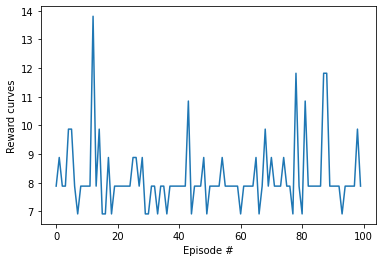

[29.09944777648153, 6.125225032250881, 16.72354733617493, 8.821164611314522, 8.543807340029584, 31.368613801012476, 26.448575446539177, 13.17983786985482, 6.872330499342777, 1.3485483878571178]


In [ ]:
env = gym.make('CartPole-v1')
import collections
import statistics
#Initializing Agent
agent = Agent(lr=0.001, action_size=env.action_space.n)
#Number of episodes
max_episodes = 100
tf.compat.v1.reset_default_graph()
reward_list = []
average_reward_list = []
begin_time = datetime.datetime.now()

reward_n = []
done_n = []
state_n = []
total_running_reward = []

experiments=10

variance_episodic_reward=[]
nVal = [4]
total_experiment_running_reward=[]
episodes_reward = []
sumRewards = 0
for n_steps in nVal:
  for i in range(experiments):
      print("#######################################")
      print("############# Starting Experiment ",i,"#############")
      print("#######################################")
      running_reward = 0
      total_episodic_reward=[]
      total_running_reward=np.zeros(max_episodes+1)
      episodes_reward: collections.deque = collections.deque(maxlen=max_episodes+1)

      for ep in range(1, max_episodes + 1):
          state = env.reset().reshape(1,-1)
          done = False
          stateLast = state
          ep_rew = 0
          sumRewards = 0
          while not done:
              for i in range(1,n_steps+1):  
                action = agent.sample_action(stateLast) ##Sample Action
                next_state, reward, done, info = env.step(action) ##Take action
                next_state = next_state.reshape(1,-1)
                reward_n = (0.99**(i-1)) * reward
                sumRewards += reward_n
                done_n.append(done)
                state_n.append(next_state)
                stateLast = next_state
              
              action = agent.sample_action(stateLast) ##Sample Action
              next_state, reward, done, info = env.step(action) ##Take action
              next_state = next_state.reshape(1,-1)
              stateLast = stateLast.reshape(1,-1)
              ep_rew += sumRewards
              agent.learn(state, action, sumRewards, stateLast, done) ##Update Parameters
              state = next_state ##Updating State
          reward_list.append(sumRewards)
          episodes_reward.append(sumRewards)
          running_reward = statistics.mean(episodes_reward)
          total_episodic_reward.append(sumRewards)
          total_running_reward[ep] = running_reward


          if ep % 10 == 0:
              avg_rew = np.mean(reward_list[-10:])
              print('Episode ', ep, 'Reward %f' % ep_rew,'AVERAGE Reward %f' % avg_rew)
          if ep % 100:
              avg_100 =  np.mean(reward_list[-100:])
              if avg_100 > 195.0:
                  print('Stopped at Episode ',ep)
                  break
          variance=np.var(total_episodic_reward)
      total_experiment_running_reward.append(total_running_reward)
      
      variance_episodic_reward.append(variance)
      print(f'\n Variance of the {i}th run is{variance}')
      print(f'\nSolved at episode {i}: average reward: {running_reward:.2f}!')
      ##Plot for Rewards for each episode
      plt.plot(total_episodic_reward)
      plt.ylabel('Reward curves')
      plt.xlabel('Episode #')
      plt.show()
  print(variance_episodic_reward)

### Plot for variance

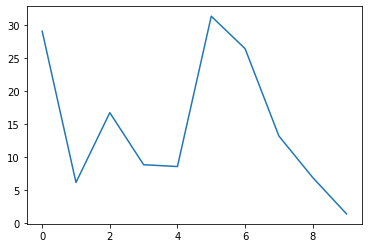

In [ ]:
#Plot for variance_episodic_reward
plt.plot(variance_episodic_reward)
plt.show()


### Code for  Render

In [ ]:
# Render an episode and save as a GIF file

display = Display(visible=0, size=(400, 300))
display.start()


def render_episode(env: gym.Env, model: tf.keras.Model, max_steps: int): 
  screen = env.render(mode='rgb_array')
  im = Image.fromarray(screen)

  images = [im]
  
  state = tf.constant(env.reset(), dtype=tf.float32)
  for i in range(1, max_steps + 1):
    state = tf.expand_dims(state, 0)
    action_probs, _ = model(state)
    action = np.argmax(np.squeeze(action_probs))
    state, _, done, _ = env.step(action)
    state = tf.constant(state, dtype=tf.float32)

    # Render screen every 10 steps
    if i % 10 == 0:
      screen = env.render(mode='rgb_array')
      images.append(Image.fromarray(screen))
  
    if done:
      break
  
  return images


# Save GIF image
images = render_episode(env, agent.ac_model, 200)
image_file = 'cartpole-v1.gif'
# loop=0: loop forever, duration=1: play each frame for 1ms
images[0].save(
    image_file, save_all=True, append_images=images[1:], loop=0, duration=1)


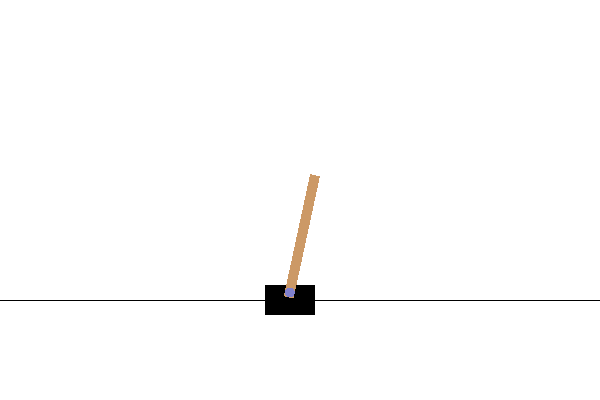

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(image_file)